Predction for Boston housing data using linear regression. This is a sample data comes inbuilt with sklearn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.datasets import load_boston


In [13]:
boston = load_boston()

In [14]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [15]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
boston_df["PRICE"] = boston.target

In [36]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [45]:
target_data = boston_df["PRICE"]
feature_set_data = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set_data, target_data)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lin_reg = LinearRegression()

In [53]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
predictions = lin_reg.predict(X_test)

In [59]:
accuracy_df = pd.DataFrame(data={"predictions":predictions, "actual_value":y_test}).reset_index(drop=True)
accuracy_df.head(5)

,predictions,actual_value
0,17.537540,15.1
1,23.340774,19.4
2,19.354567,27.5
3,15.122662,10.4
4,35.333090,33.4


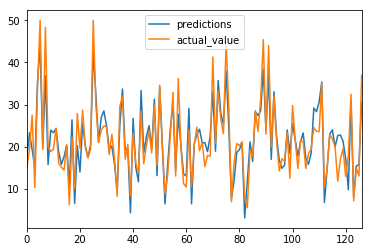

In [60]:
accuracy_df.plot()

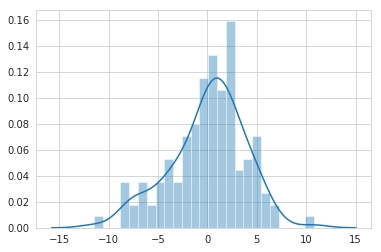

In [66]:
sns.set_style(style="whitegrid")
sns.distplot(accuracy_df["predictions"]-accuracy_df["actual_value"], bins=25)

# Difference distribution of predicted values and actual results are centered around zero means predictions are very close to actual value

In [73]:
from sklearn import metrics

In [78]:
print("MAE: ", metrics.mean_absolute_error(accuracy_df["predictions"], accuracy_df["actual_value"]))
print("MSE: ", metrics.mean_squared_error(accuracy_df["predictions"], accuracy_df["actual_value"]))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(accuracy_df["predictions"], accuracy_df["actual_value"])))

MAE:  2.9048143668080835
MSE:  14.188825676781084
RMSE:  1.7043515971794327
